# Mission

I wish to examine the behavior of the grovers of grover algorithm in adiabatic computation

## Plan

We start with two hamiltonians over 4 qubits :
$$H_0=  I^{\otimes{4}} - |in><in| $$
$$ \mbox{where}\quad|in> = \frac{1}{\sqrt{N}}\sum^{N-1}_{x=0}|x>$$
$$H_1 = I^{\otimes{4}} -|w><w| $$
$$ \mbox{where}\quad|w> = |0101>$$


In [1]:
%matplotlib inline

from IPython.display import Image,display

from numpy import pi

from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import LH_tools

# from importlib import reload 
# reload(LH_tools)

In [2]:
nq = 7
in_state = tensor([basis(2,0),basis(2,1),basis(2,0),basis(2,1),basis(2,0),basis(2,1),basis(2,0)])

id_n = tensor([qeye(2)]*nq)
psi0 = tensor([basis(2,0)]*nq)
psi0= hadamard_transform(nq)*psi0
H_0 = id_n-psi0*psi0.trans()
rot_H0, rot_psi0 = LH_tools.rotate_by_had(H_0, psi0)
display(H_0)

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2]], shape = [128, 128], type = oper, isherm = True
Qobj data =
[[ 0.9921875 -0.0078125 -0.0078125 ..., -0.0078125 -0.0078125 -0.0078125]
 [-0.0078125  0.9921875 -0.0078125 ..., -0.0078125 -0.0078125 -0.0078125]
 [-0.0078125 -0.0078125  0.9921875 ..., -0.0078125 -0.0078125 -0.0078125]
 ..., 
 [-0.0078125 -0.0078125 -0.0078125 ...,  0.9921875 -0.0078125 -0.0078125]
 [-0.0078125 -0.0078125 -0.0078125 ..., -0.0078125  0.9921875 -0.0078125]
 [-0.0078125 -0.0078125 -0.0078125 ..., -0.0078125 -0.0078125  0.9921875]]

In [7]:

# plot_qubism(in_state,legend_iteration=);plt.show()

In [8]:
H_1 = id_n - in_state*in_state.trans()
display(H_1)

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2]], shape = [128, 128], type = oper, isherm = True
Qobj data =
[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]

This is the two hamiltonians we will use with in this demo

In [9]:
h_t= [[H_0,'(t_max-t)/t_max'],
      [H_1, 't/t_max']]

In [18]:
P_per_speed = []
evals_per_speed = []
for speed in range(25,50):
    tlist = np.linspace(0, speed, 100)
    args = {'t_max': max(tlist)}
    P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)
    P_per_speed.append(P_mat)
    evals_per_speed.append(evals_mat)
    

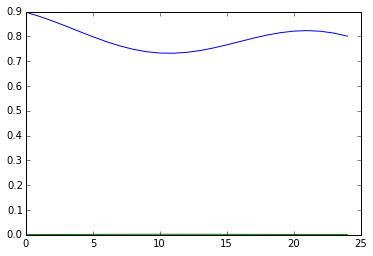

In [19]:
plt.plot([p[-1] for p in P_per_speed])

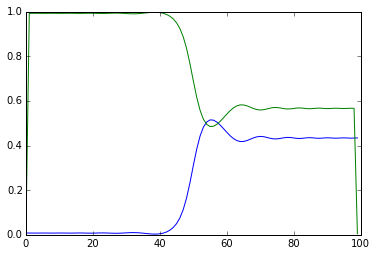

In [27]:
speed = 150
tlist = np.linspace(0, speed, 100)
args = {'t_max': max(tlist)}
P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)
plt.plot(P_mat)

## Plot the occupation probabilities for two states  

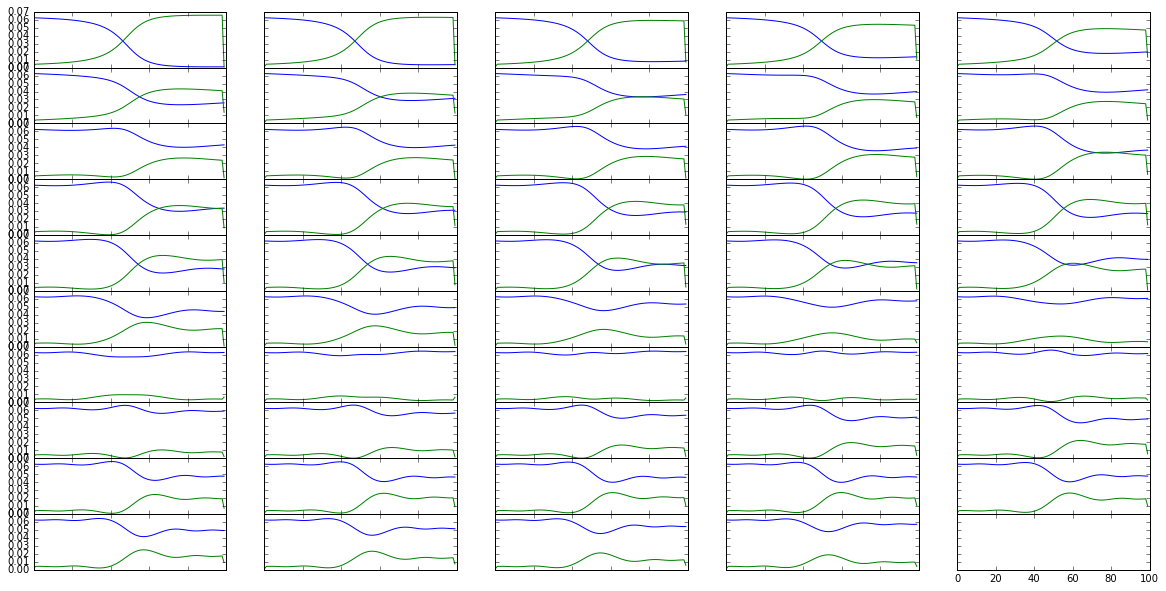

In [44]:
plotarr = []
speed = 0
f, plotarr = plt.subplots(10,5, sharex=True, sharey=True,figsize=(20,10))
try:
    for plot_group in plotarr:
        for plot in plot_group:
            plot.plot(P_per_speed[speed])
            speed+=1
except IndexError:
    pass # ignore
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
f.subplots_adjust(hspace=0)

plt.show()


In [8]:
tlist = np.linspace(0, 10, 100)
args = {'t_max': max(tlist)}
P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)
plt.plot(evals_mat)


NameError: name 'evals_per_speed' is not defined

--- 2.448509693145752 seconds ---


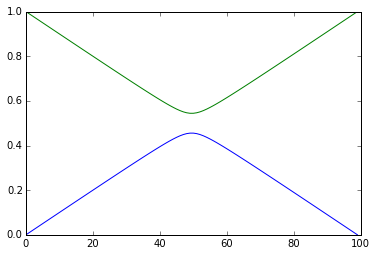

In [10]:
import time
start_time = time.time()


tlist = np.linspace(0, 100, 100)
args = {'t_max': max(tlist)}
P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)
plt.plot(evals_mat)

print("--- %s seconds ---" % (time.time() - start_time))

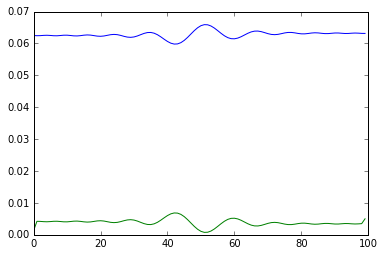

In [46]:
# options = options = Options(nsteps = 100000)
tlist = np.linspace(0, 125, 100)
args = {'t_max': max(tlist)}

P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, rot_psi0, False)
plt.plot(P_mat)

In [9]:
plt.figure(figsize=(20,10))

# Energies 
plt.plot(evals_per_speed[0])
plt.show()




NameError: name 'evals_per_speed' is not defined

In [ ]:


tlist = np.linspace(0, 10, 100)
args = {'t_max': max(tlist)}
P_mat,evals_mat = LH_tools.simulate_adiabatic_process2(tlist, h_t, args, in_state, False)
plt.plot(evals_mat)
